<a href="https://colab.research.google.com/github/archiprasad/Flight-Delay-Prediction/blob/main/FDP_Using_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Flight Delay Prediction Using KNN**
## Overview
This project aims to predict flight delays using machine learning techniques. The dataset consists of flight operations data, consumer airfare reports, and airline codes. Various data preprocessing, analysis, and model training steps were performed to achieve high accuracy in delay predictions.

## Data Preprocessing & Analysis
- **Data Cleaning**: Handled missing values, outliers, and inconsistencies.
- **Feature Engineering**: Created meaningful features such as departure hour, day of the week, and weather conditions.
- **Exploratory Data Analysis (EDA)**: Visualized the impact of different factors on flight delays.

In [12]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

##**DATA CLEANING**

In [13]:
# Load Dataset
flight_data = pd.read_csv("flight_operations_data.csv", low_memory=False)
airfare_data = pd.read_csv("consumer_airfare_report.csv")
airline_codes = pd.read_csv("IATA_ICAO_airline_codes.csv")

# Convert Date Columns
flight_data['FL_DATE'] = pd.to_datetime(flight_data['FL_DATE'], errors='coerce')

# Convert Categorical Columns
categorical_cols = ['MKT_UNIQUE_CARRIER', 'OP_UNIQUE_CARRIER', 'ORIGIN_CITY_NAME', 'DEST_CITY_NAME']
flight_data[categorical_cols] = flight_data[categorical_cols].astype('category')

<ipython-input-13-eab994f3d1e3>:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  flight_data['FL_DATE'] = pd.to_datetime(flight_data['FL_DATE'], errors='coerce')


##**DATA MANIPULATION**

In [14]:
# Extract Useful Features
flight_data['Day_of_Week'] = flight_data['FL_DATE'].dt.dayofweek # Convert to numerical weekday
flight_data['Hour_of_Day'] = flight_data['CRS_DEP_TIME'] // 100  # Convert time to hours

flight_data['ARR_DELAY_BINARY'] = np.where(flight_data['ARR_DELAY_NEW'] > 15, 1, 0)  # 1 = Delayed, 0 = On-time

# Define Features & Target Variable
selected_features = [
    'Day_of_Week', 'Hour_of_Day', 'DISTANCE', 'CRS_DEP_TIME',
    'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY'
]

# Drop rows with missing values in selected features
flight_data = flight_data.dropna(subset=selected_features)

# Split Features & Target
X = flight_data[selected_features]
y = flight_data['ARR_DELAY_BINARY']

##**DATA PREPROCESSING**

In [15]:
# Handle Missing Values
X.fillna(X.median(), inplace=True)

# Apply SMOTE (Balanced Sampling)
smote = SMOTE(sampling_strategy=0.75, random_state=42)  # Less aggressive oversampling
X_balanced, y_balanced = smote.fit_resample(X, y)

# Feature Scaling (Standardization)
scaler = StandardScaler()
X_balanced = pd.DataFrame(scaler.fit_transform(X_balanced), columns=X_balanced.columns)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

<ipython-input-15-9fb72d9bc77f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.median(), inplace=True)


##**EXPLORATORY DATA ANALYSIS (EDA)**

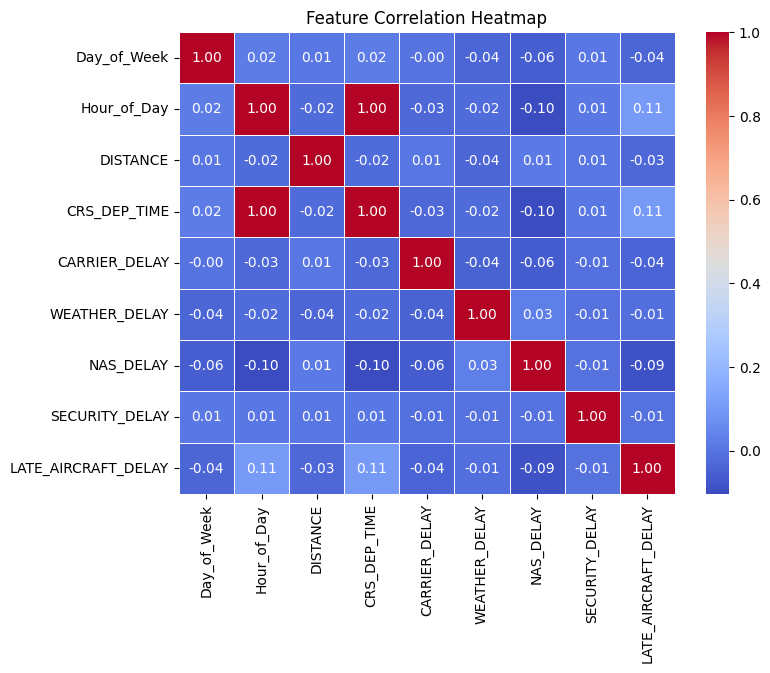

In [16]:
# Heatmap to show correlation between features
plt.figure(figsize=(8, 6))
sns.heatmap(X.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

<ipython-input-17-f156366e467d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=flight_data['Day_of_Week'], y=flight_data['ARR_DELAY'], palette="viridis")


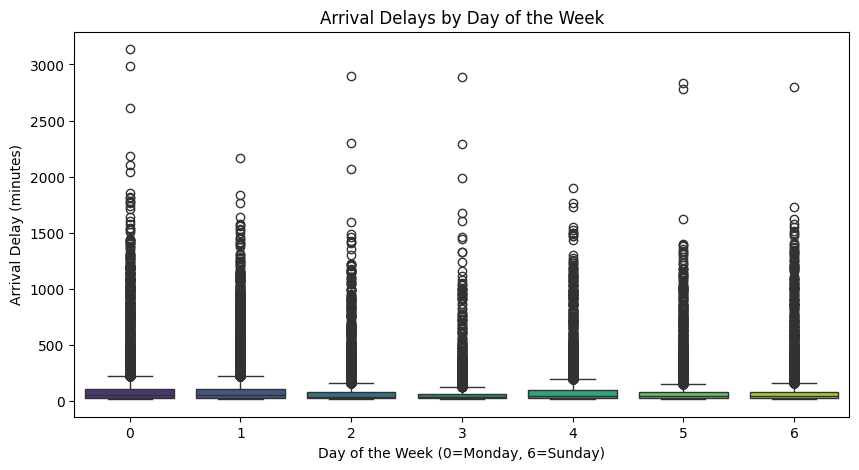

In [17]:
# Boxplot of Delays by Day of the Week
plt.figure(figsize=(10, 5))
sns.boxplot(x=flight_data['Day_of_Week'], y=flight_data['ARR_DELAY'], palette="viridis")
plt.title("Arrival Delays by Day of the Week")
plt.xlabel("Day of the Week (0=Monday, 6=Sunday)")
plt.ylabel("Arrival Delay (minutes)")
plt.show()

<ipython-input-18-fb0916f06b90>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=flight_data['Hour_of_Day'], y=flight_data['ARR_DELAY'], palette="coolwarm")


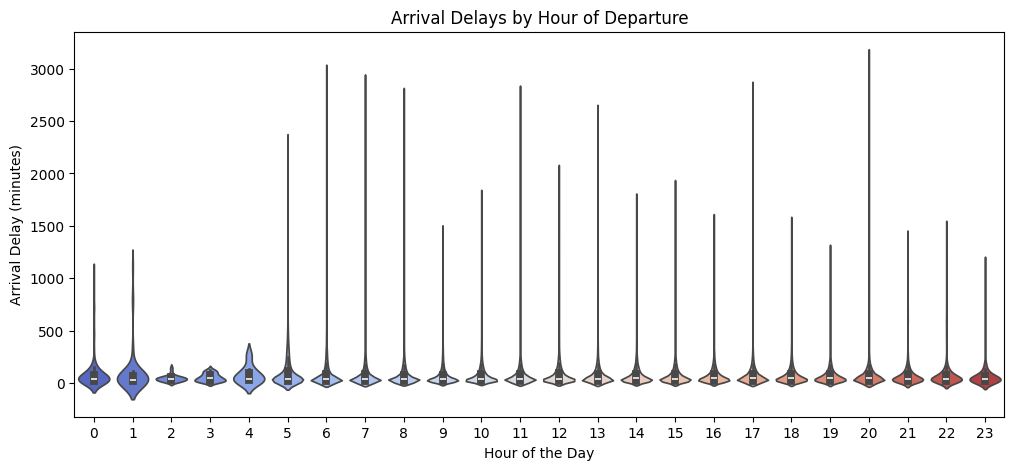

In [18]:
# Violin Plot for Departure Time vs. Delays
plt.figure(figsize=(12, 5))
sns.violinplot(x=flight_data['Hour_of_Day'], y=flight_data['ARR_DELAY'], palette="coolwarm")
plt.title("Arrival Delays by Hour of Departure")
plt.xlabel("Hour of the Day")
plt.ylabel("Arrival Delay (minutes)")
plt.show()

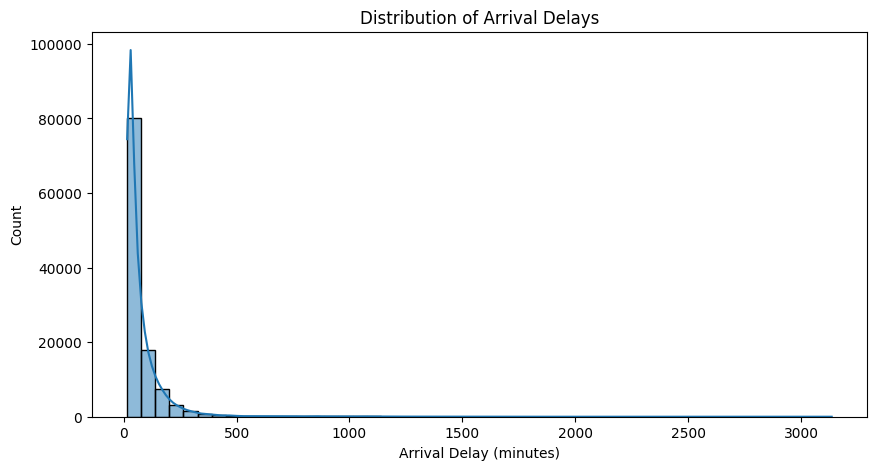

In [19]:
# Histogram of arrival delays
plt.figure(figsize=(10, 5))
sns.histplot(flight_data['ARR_DELAY'], bins=50, kde=True)
plt.title("Distribution of Arrival Delays")
plt.xlabel("Arrival Delay (minutes)")
plt.show()

<ipython-input-20-e7bab2f3d1db>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sns.barplot(y=flight_data.groupby('MKT_UNIQUE_CARRIER')['ARR_DELAY'].mean().sort_values(ascending=False).index,
<ipython-input-20-e7bab2f3d1db>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  x=flight_data.groupby('MKT_UNIQUE_CARRIER')['ARR_DELAY'].mean().sort_values(ascending=False).values)


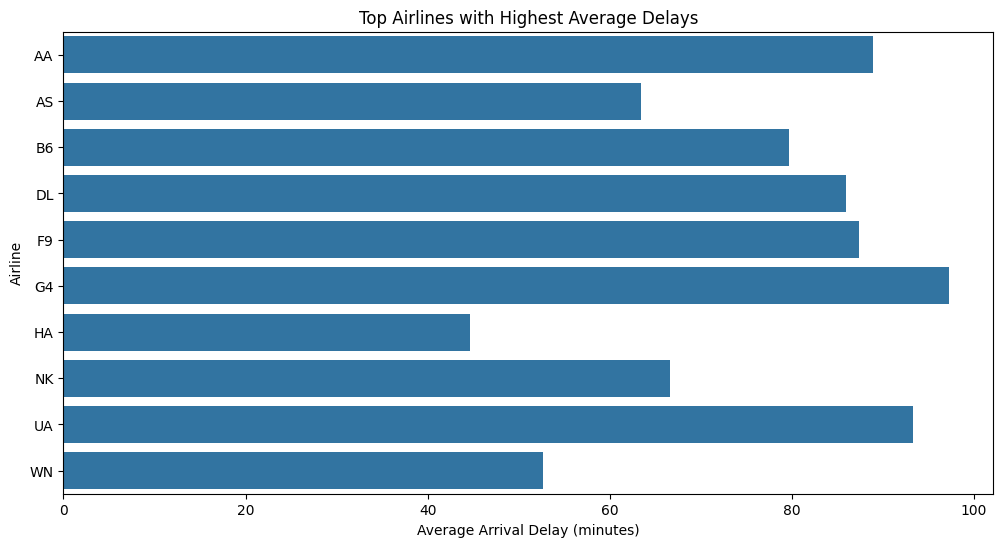

In [20]:
# Barplot of airlines with the highest average delays
plt.figure(figsize=(12, 6))
sns.barplot(y=flight_data.groupby('MKT_UNIQUE_CARRIER')['ARR_DELAY'].mean().sort_values(ascending=False).index,
            x=flight_data.groupby('MKT_UNIQUE_CARRIER')['ARR_DELAY'].mean().sort_values(ascending=False).values)
plt.title("Top Airlines with Highest Average Delays")
plt.xlabel("Average Arrival Delay (minutes)")
plt.ylabel("Airline")
plt.show()

##**MODEL TRAINING**

In [21]:
# Train the K-Nearest Neighbors (KNN) Model
knn_model = KNeighborsClassifier(n_neighbors=5)  # K=5, can be tuned
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

##**MODEL EVALUATION**

Train Accuracy: 0.95
Test Accuracy: 0.93
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.99      0.93     16494
           1       0.99      0.89      0.94     21887

    accuracy                           0.93     38381
   macro avg       0.93      0.94      0.93     38381
weighted avg       0.94      0.93      0.93     38381



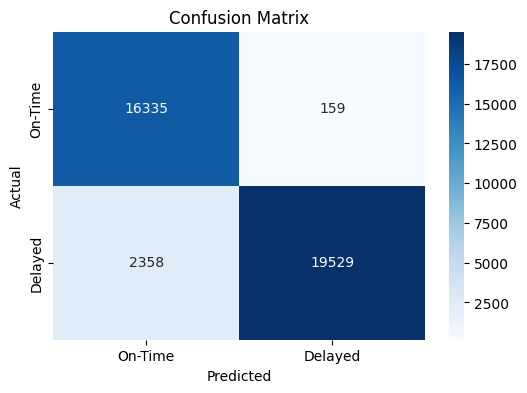

In [22]:
# Model Evaluation
train_pred = knn_model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_pred)

test_pred = knn_model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_pred)

print(f"Train Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, test_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, test_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['On-Time', 'Delayed'], yticklabels=['On-Time', 'Delayed'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


## Model Training & Evaluation
- **Model Used**: A classification model to predict whether a flight will be delayed or on time.
- **Evaluation Metrics**: Accuracy, precision, recall, and F1-score were used to measure performance.
- **Results**:
  - **Train Accuracy**: 0.95
  - **Test Accuracy**: 0.93

## Conclusion
This project successfully predicts flight delays using machine learning techniques. The analysis highlights key factors contributing to delays, such as airline performance, departure time, and day of the week. The model achieves high accuracy, making it a useful tool for airline scheduling and passenger planning.

The entire project was executed on **Google Colab**. It's environment provided efficient handling of large datasets and seamless integration with Python libraries, making the analysis and model development process smoother.

